 #  <center> YELO BANK TECHNICAL SKILL TEST 🔔

# Task 1 
###### (Use loan_data.xlsx  file for Task 1) 📌




Title | Definition
---|---------
`CUSTOMER_NO`| id of costumer
`BEGIN_DATE` |  open date of loan
`END_DATE` | close date of loan  
`CLOSE_DATE` | actual close date of loan
`BRANCH_NAME` | name of product
`INTEREST_RATE` | loan interest rate(annual)
`BIRTH_DATE` |  birth date of customer
`PRODUCT_NAME` | name of product
`AMOUNT` |  given amount of loan
`REMAIN_AMOUNT` | customer's debt to bank
`CATEGORY` |  cutomer category (GB -good bank / BB- bad bank) 
`GSM_NO` |  Mobile Phone 



 ## <center> Customer Segmentation

##  1. Data cleaning & Preparation 🧹
### Tips for data cleaning : 
 ##### Pay attention  ❗
- Data types
- Null values
- Extreme values
- Duplicates
- Correct telephone number format (ex.: 994752000000 , numbers should be start with 99475, 99476, 99433 )

## 2. EDA ( Exploratory Data Analysis) 📈
### Tips :
1. Yearly and monthly sales amount and count (using pivot_table func.)
2. Active & non-active customer distribution by product names
3. Your approach 🙂 (mandatory)

## 3. Segmentation for loan offer  🙋🏻🙋🏻‍♂️
##### Only these customers are able to take loan:

1. Age between 25 and 64
2. Category not in "BB"
3. Branch name not like "UPA"
4. Don't have active loan or remain amount < 60 %

### After defining your segment follow this steps :

- Split your segment into Target and Test customers
- Test clients should be 10 % of segment
- Use stratified sampling method for choosing test clients
- Show them as by creating a new column named as "TYPE"






# STEP 1

In [2]:
import pandas as pd
from datetime import datetime

df1 = pd.read_excel('loan_data.xlsx')

df1['END_DATE'] = pd.to_datetime(df1['END_DATE'])
df1['BEGIN_DATE'] = pd.to_datetime(df1['BEGIN_DATE'])
df1['BIRTH_DATE'] = pd.to_datetime(df1['BIRTH_DATE'])
df1['GSM_NO'] = df1['GSM_NO'].astype(str)

filt1 = df1[~df1['GSM_NO'].str.startswith(('99475', '99476', '99433'))]
df1.loc[filt1.index, 'GSM_NO'] = None
filt2 = df1[(df1['GSM_NO'].str.len() != 12) & (df1['GSM_NO'].notnull())]
df1.loc[filt2.index, 'GSM_NO'] = None #Göstərilmiş nömrələrdən kənar ifadələri sıfırlamaq

gsm_map = df1.groupby('CUSTOMER_NO')['GSM_NO'].last().to_dict()
df1['GSM_NO'] = df1['CUSTOMER_NO'].map(gsm_map)  #Eyni müştərilər var ki, bir neçə məhsulu var. Nömrələri bəzilərində yoxdur.Bərpa

curr_date = datetime.now()
df1.loc[(df1['REMAIN_AMOUNT'] == 0) & (df1['CLOSE_DATE'].isna()), 'CLOSE_DATE'] = curr_date #Bəzi borclar ödənib, lakin baglanma vaxtlari qeyd olunmayib. Baglanma vaxtini sysdate olaraq ayarladim.
df1['CLOSE_DATE'] = pd.to_datetime(df1['CLOSE_DATE'], errors='coerce')
df1


C:\Users\Hp\AppData\Local\Temp\ipykernel_9760\862397138.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['BIRTH_DATE'] = pd.to_datetime(df1['BIRTH_DATE'])


,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,GB,994758000022
1,469638,1977-01-12,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,GB,994758000023
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,GB,994758000025
3,490443,1987-03-01,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,GB,994758000026
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,GB,994758000027
...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,GB,None
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,GB,994767003628
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,GB,None
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,GB,None


# STEP 2
### Sual 1
Illik və aylıq satışların pivot table ilə verilməsi

In [3]:
import numpy as np
df1['BEGIN_DATE'] = pd.to_datetime(df1['BEGIN_DATE'])

df1['Year'] = df1['BEGIN_DATE'].dt.year
df1['Month'] = df1['BEGIN_DATE'].dt.month

yearly_sales = pd.pivot_table(df1, values='AMOUNT', index='Year', aggfunc={'AMOUNT': [np.sum, np.size]}, fill_value=0)
monthly_sales = pd.pivot_table(df1, values='AMOUNT', index=['Year', 'Month'], aggfunc={'AMOUNT': [np.sum, np.size]}, fill_value=0)

yearly = pd.DataFrame(yearly_sales)
monthly = pd.DataFrame(monthly_sales)

yearly

,size,sum
Year,,
2021,3098,32825320.0
2022,6837,64071831.0
2023,10139,102604883.4


### Sual 2
Məhsullara görə Aktiv və Aktiv olmayan müştərilərin dağılımı


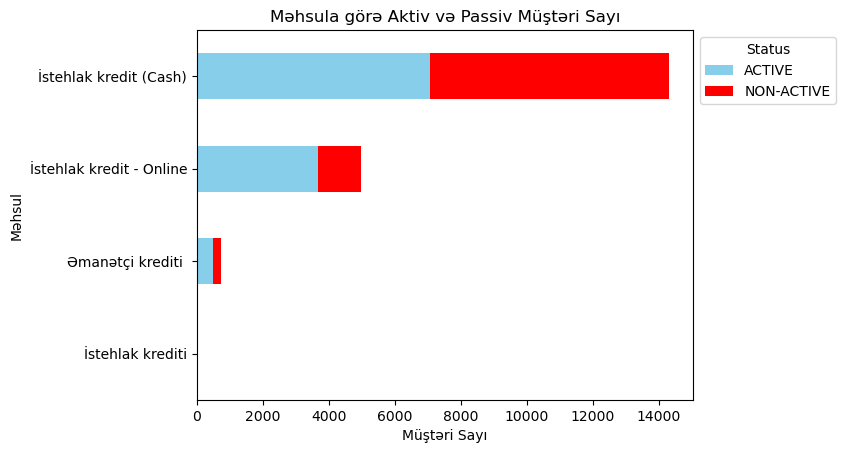

In [4]:
import matplotlib.pyplot as plt


df1['STATUS'] = np.where(df1['CLOSE_DATE'].isnull(),'ACTIVE','NON-ACTIVE')
c_count = df1.groupby(['PRODUCT_NAME', 'STATUS']).size().unstack(fill_value=0)
t_count = c_count.sum(axis=1).sort_values(ascending=True)

c_count = c_count.reindex(index=t_count.index)
c_count.plot(kind='barh', y=['ACTIVE', 'NON-ACTIVE'], stacked=True,color=['#87CEEB','red'])

plt.title('Məhsula görə Aktiv və Passiv Müştəri Sayı')
plt.xlabel('Müştəri Sayı')
plt.ylabel('Məhsul')
plt.legend(title='Status', bbox_to_anchor=(1, 1))

plt.show()


### Sual 3


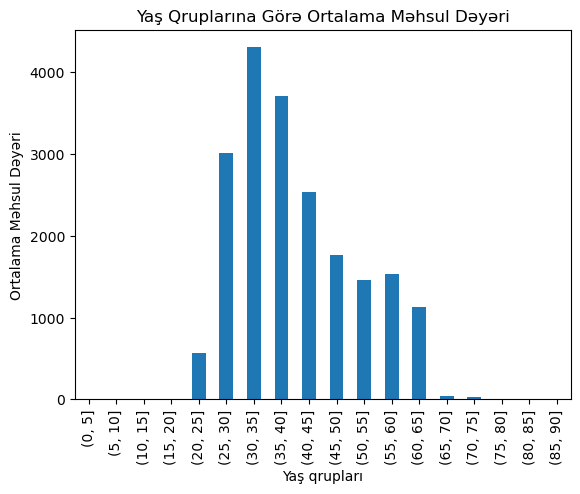

In [5]:

df1['AGE'] = curr_date.year - df1['BIRTH_DATE'].dt.year

a_group = pd.cut(df1['AGE'], bins=range(0, df1['AGE'].max() + 5, 5))
avg_a = df1.groupby(a_group)['AMOUNT'].count()

avg_a.plot(kind='bar')

plt.title('Yaş Qruplarına Görə Ortalama Məhsul Dəyəri')
plt.xlabel('Yaş qrupları')
plt.ylabel('Ortalama Məhsul Dəyəri')
plt.show()

In [ ]:
df1.to_excel('clean.xlsx')

# <center> Task 2

#### SQL task  ==> check attached excel file 

# <center> Task 3

## Insight Finding 📝

Analyze and visualize data and present your findings (preferably PPT)

Prepare the business proposal using data set provided in PYTHON task. Final presentation need to include following insights:


1.	Customer Segmentations and their profile (Exp. Customer between age 25-30 majorly set to require loans between X-Y AZN with Z month period)
2.	Top 3 customer segments which can increase sales if targeted properly. (Exp. Students can be targeted during back to school period as they are not targeted properly and have less risk based on data)
3.	The new bank product to increase the sales and cover customers need. ( Exp. Students credit X AZN with Y period can be attractive and cover majority of customer base.)


###### Note: Business proposal need to be part of business story telling within presentation.

### <center> GOOD LUCK!